In [3]:
import torch.nn as nn
import torch
import torch.nn.functional as F
import os


In [4]:
net = nn.Sequential(
    nn.Conv2d(1, 96, kernel_size=11, stride=4, padding=1), nn.ReLU(),
    nn.MaxPool2d(kernel_size=3, stride=2),
    nn.Conv2d(96, 256, kernel_size=5, padding=2), nn.ReLU(),
    nn.MaxPool2d(kernel_size=3, stride=2),
    nn.Conv2d(256, 384, kernel_size=3, padding=1), nn.ReLU(),
    nn.Conv2d(384, 384, kernel_size=3, padding=1), nn.ReLU(),
    nn.Conv2d(384, 256, kernel_size=3, padding=1), nn.ReLU(),
    nn.MaxPool2d(kernel_size=3, stride=2),
    nn.Flatten(),
    nn.Linear(6400, 4096), nn.ReLU(),
    nn.Dropout(p=0.5),
    nn.Linear(4096, 4096), nn.ReLU(),
    nn.Dropout(p=0.5),
    nn.Linear(4096, 10))

In [ ]:
net.load_state_dict(torch.load('net_alex_256.params', map_location=torch.device('cpu')))

<All keys matched successfully>

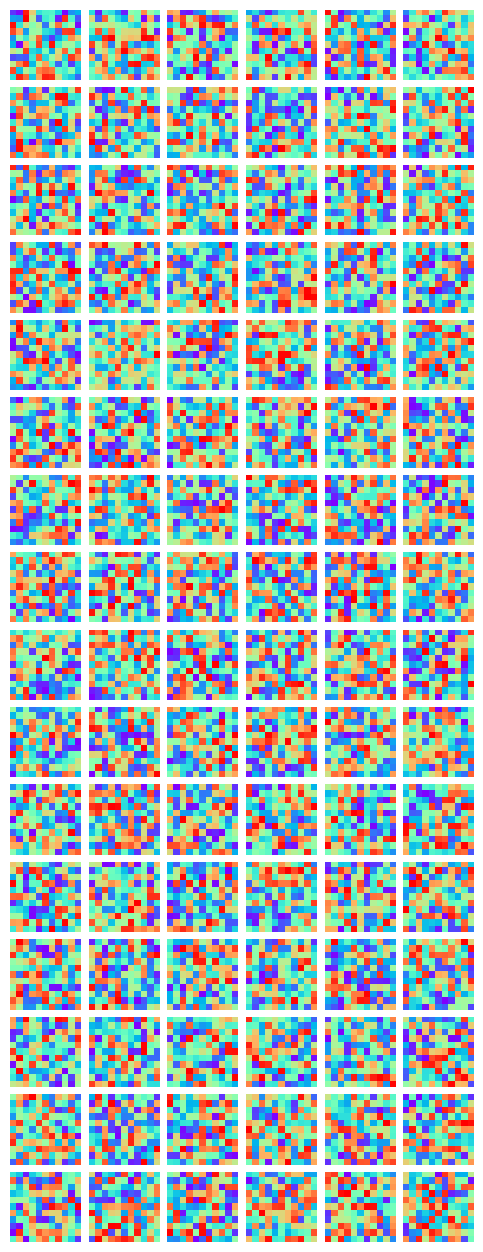

In [15]:
# 可视化net的权重
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np

def plot_conv_weights(weights, num_cols=6):
    num_kernels = weights.shape[0]
    num_rows = num_kernels // num_cols
    fig = plt.figure(figsize=(num_cols, num_rows))
    for i in range(num_kernels):
        ax1 = fig.add_subplot(num_rows, num_cols, i+1)
        ax1.imshow(weights[i][0, ...], cmap='rainbow')
        ax1.axis('off')
        ax1.set_xticklabels([])
        ax1.set_yticklabels([])

    plt.subplots_adjust(wspace=0.1, hspace=0.1)
    plt.show()

def plot_conv_layer(layer, image):
    fig = plt.figure(figsize=(10, 10))
    num_kernels = layer.weight.shape[0]
    for i in range(num_kernels):
        ax1 = fig.add_subplot(8, 8, i+1)
        ax1.imshow(image[i], cmap='gray')
        ax1.axis('off')
        ax1.set_xticklabels([])
        ax1.set_yticklabels([])

    plt.subplots_adjust(wspace=0.1, hspace=0.1)
    plt.show()

def plot_conv_output(conv_img):
    fig = plt.figure(figsize=(10, 10))
    num_kernels = conv_img.shape[0]
    for i in range(num_kernels):
        ax1 = fig.add_subplot(8, 8, i+1)
        ax1.imshow(conv_img[i], cmap='gray')
        ax1.axis('off')
        ax1.set_xticklabels([])
        ax1.set_yticklabels([])

    plt.subplots_adjust(wspace=0.1, hspace=0.1)
    plt.show()

def plot_image(image):
    fig = plt.figure(figsize=(3, 3))
    ax1 = fig.add_subplot(1, 1, 1)
    ax1.imshow(image, cmap='gray')
    ax1.axis('off')
    ax1.set_xticklabels([])
    ax1.set_yticklabels([])

    plt.show()

def get_weights(layer):
    # 拷贝权重
    weights = layer.weight.data
    weights = weights.cpu().numpy()
    return weights

def get_single_image(img):
    img = img.unsqueeze(0)
    img = img.unsqueeze(0)
    return img

def get_single_layer_output(layer, img):
    img = img.unsqueeze(0)
    img = img.unsqueeze(0)
    return layer(img).data

def get_single_layer_output(layer, img):
    img = img.unsqueeze(0)
    img = img.unsqueeze(0)
    return layer(img).data

plot_conv_weights(get_weights(net[0]))

In [13]:
net[0].weight.data.shape

torch.Size([96, 1, 11, 11])

In [16]:
net[0].weight.data[0][0]

tensor([[-0.0193, -0.0216,  0.0209,  0.0091, -0.0067, -0.0042, -0.0038, -0.0089,
         -0.0218, -0.0135, -0.0112],
        [-0.0126, -0.0134,  0.0223,  0.0052, -0.0170, -0.0054, -0.0029, -0.0207,
          0.0196, -0.0042, -0.0173],
        [ 0.0215, -0.0063,  0.0073,  0.0007,  0.0050, -0.0155,  0.0042,  0.0159,
         -0.0028,  0.0035, -0.0218],
        [ 0.0182,  0.0117, -0.0127,  0.0020,  0.0031, -0.0071, -0.0086, -0.0169,
          0.0188,  0.0191, -0.0094],
        [-0.0137,  0.0019, -0.0061,  0.0059,  0.0168, -0.0131, -0.0191, -0.0117,
         -0.0060,  0.0136,  0.0083],
        [-0.0108, -0.0223,  0.0113, -0.0015,  0.0184, -0.0064,  0.0213, -0.0044,
          0.0043,  0.0027, -0.0050],
        [ 0.0064,  0.0026,  0.0189, -0.0079, -0.0096,  0.0003, -0.0118,  0.0073,
          0.0166, -0.0005,  0.0180],
        [-0.0181, -0.0164, -0.0174, -0.0059,  0.0168, -0.0078,  0.0023,  0.0090,
         -0.0085,  0.0191,  0.0140],
        [ 0.0055,  0.0147,  0.0198, -0.0104,  0.0051,  0